In [103]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
print(os.getcwd())

/Users/sergioguerrero/Desktop/Project 1


In [85]:
df_sg = pd.read_csv("california_wildfire_data_cleaned-Copy1.csv")

In [105]:
df_sg = df_sg[["Fatalities","Acres Burned"]]

In [113]:
df_sg = df_sg[df_sg["Fatalities"] !=0]

In [115]:
df_sg

,Fatalities,Acres Burned
308,1.0,1086.0
837,22.0,36807.0
838,4.0,9989.0
839,9.0,36523.0
850,6.0,51624.0
851,3.0,44573.0
1025,1.0,38008.0
1081,3.0,229651.0
1090,1.0,410203.0
1189,85.0,153336.0


In [133]:
df_sg.sort_values(by=["Acres Burned"], ascending=True)

,Fatalities,Acres Burned
1420,2.0,1011.0
308,1.0,1086.0
1423,1.0,8799.0
838,4.0,9989.0
839,9.0,36523.0
837,22.0,36807.0
1025,1.0,38008.0
851,3.0,44573.0
850,6.0,51624.0
1194,3.0,96949.0


In [167]:
y = [ 1011.0, 1086.0, 8799.0, 9989.0, 36523.0, 36807.0, 38008.0, 44573.0, 51624.0, 96949.0, 153336.0, 229651.0, 410203.0]

x = [2, 1, 1, 4, 9, 22, 1, 3, 6, 3, 85, 3, 1]

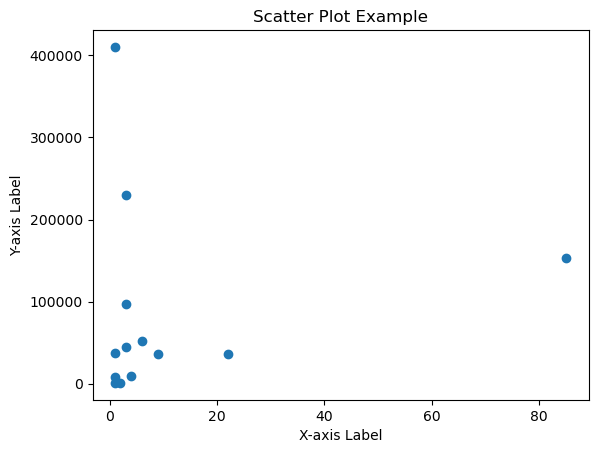

In [169]:
plt.scatter(x, y)
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot Example')
plt.show()

In [73]:
df = pd.read_csv('./california_wildfire_data_cleaned-Copy1.csv')

In [75]:
df= df[['Incident Name','County','Acres Burned','Fire Started','Fire Extinguished']]
df.head(3)

,Incident Name,County,Acres Burned,Fire Started,Fire Extinguished
0,River Fire,Inyo,407.0,2013-02-24T08:16:00Z,2013-02-28T20:00:00Z
1,Fawnskin Fire,San Bernardino,30.0,2013-04-20T17:30:00Z,2013-04-22T09:00:00Z
2,Gold Fire,Madera,274.0,2013-04-30T12:59:00Z,2013-05-01T07:00:00Z


In [77]:
bins = [0, 1000, 50000, df['Acres Burned'].max()]
labels = ['Small', 'Medium', 'Large']
df['Acres Burnned Size'] = pd.cut(df['Acres Burned'], labels=labels, bins= bins)
df.head(3)


,Incident Name,County,Acres Burned,Fire Started,Fire Extinguished,Acres Burnned Size
0,River Fire,Inyo,407.0,2013-02-24T08:16:00Z,2013-02-28T20:00:00Z,Small
1,Fawnskin Fire,San Bernardino,30.0,2013-04-20T17:30:00Z,2013-04-22T09:00:00Z,Small
2,Gold Fire,Madera,274.0,2013-04-30T12:59:00Z,2013-05-01T07:00:00Z,Small


In [79]:
df['Year Started'] = pd.to_datetime(df['Fire Started']).dt.year
df = df[df['Year Started'] != 2025 ]

In [81]:
acres_size_agg= df.groupby('Acres Burnned Size',observed=False)['Acres Burned'].agg(['mean', 'median', 'max','min', 'std'])
acres_size_agg

,mean,median,max,min,std
Acres Burnned Size,,,,,
Small,136.623965,61.0,1000.0,2.0,183.534249
Medium,8166.408269,3674.0,48920.0,1010.0,10704.944797
Large,181571.630435,96004.0,1032648.0,50198.0,205664.810618


In [83]:
grouped_df= df.groupby(['Year Started', 'Acres Burnned Size'],observed=False)['Acres Burnned Size'].size().reset_index(name='Count')


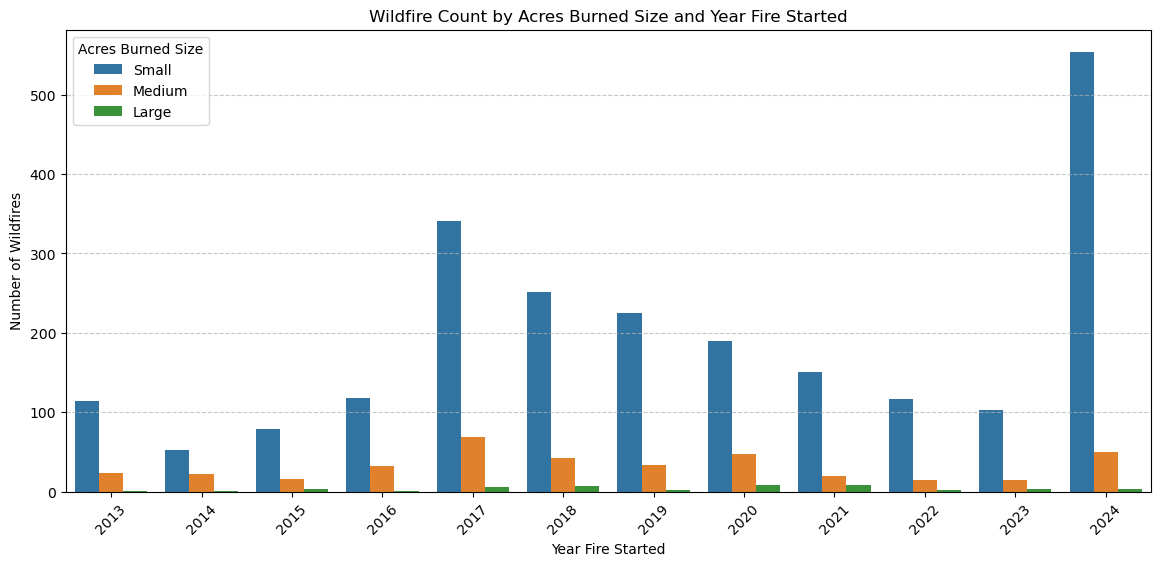

In [61]:
plt.figure(figsize=(14, 6))
sns.barplot(data=grouped_df, x='Year Started', y='Count', hue='Acres Burnned Size')
plt.xlabel('Year Fire Started')
plt.ylabel('Number of Wildfires')
plt.title('Wildfire Count by Acres Burned Size and Year Fire Started')
plt.legend(title='Acres Burned Size')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

